# Femicide In Turkey 2008 - 2020 Turkish Resource

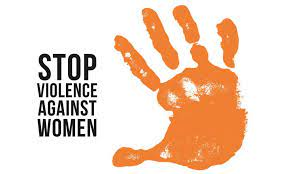

In [142]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Definition of Variables 

* **It contains information on women murdered in Turkey between 2008 and 2020.**

* **id**: Identifier
* **city**: In which city she was killed
* **age**: Adult / Underage
* **dHow the victim was killedate**: Date -when it happened
* **protectionorder**: Protection Order
* **why1, why2**: Reason for Killing
* **killer1, killer2**: Killed by whom
* **killingway1, killingway2, killingway3**: How the victim was killed
* **statusofkiller**: Status of Killer
* **year**: Year of Realization

# Loading and Checking Data

In [143]:
df=pd.read_csv("../input/femicide-in-turkey-20082020-english-dataset/femicide_in_turkey_2008_2020_englishdataset.csv")

In [144]:
df.shape

(3111, 14)

In [145]:
df.head()

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
0,1,Adana,Adult,01/02/2008,Undetectable,Because something that a man wanted did not ha...,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2008.0
1,2,Adana,NaN,01/12/2008,No,Undetectable,NaN,Boyfriend,NaN,Firearm,NaN,NaN,Suicide,2008.0
2,3,Adana,Underage,01/02/2008,No,Undetectable,NaN,Father,NaN,Assault,NaN,NaN,Prisoner,2008.0
3,4,Adana,NaN,01/04/2008,No,Undetectable,NaN,Ex Boyfriend,NaN,Firearm,NaN,NaN,Suicide,2008.0
4,5,Ankara,NaN,01/12/2008,Undetectable,Undetectable,NaN,Undetectable,NaN,Undetectable,NaN,NaN,Undetectable,2008.0


In [146]:
df.isnull().sum()

id                    0
city               1180
age                1791
date                  0
protectionorder       2
why1                  1
why2               3041
killer1               3
killer2            3102
killingway1           0
killingway2        3044
killingway3        3105
statusofkiller     1342
year                  0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3111 non-null   int64  
 1   city             1931 non-null   object 
 2   age              1320 non-null   object 
 3   date             3111 non-null   object 
 4   protectionorder  3109 non-null   object 
 5   why1             3110 non-null   object 
 6   why2             70 non-null     object 
 7   killer1          3108 non-null   object 
 8   killer2          9 non-null      object 
 9   killingway1      3111 non-null   object 
 10  killingway2      67 non-null     object 
 11  killingway3      6 non-null      object 
 12  statusofkiller   1769 non-null   object 
 13  year             3111 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 340.4+ KB


In [148]:
df["year"]=df["year"].astype(int)   # chaneg type of data column to int

In [149]:
df["year"].value_counts().sort_index()

2         1
2008     65
2009    123
2010    194
2011    121
2012    139
2013    229
2014    290
2015    295
2016    282
2017    348
2018    403
2019    427
2020    194
Name: year, dtype: int64

In [150]:
df["killer1"].value_counts().head(10)    #Killed by whom

Husband                      1040
Undetectable                  504
Boyfriend                     306
Someone She Knows             275
Ex Husband                    179
Son                           113
Father                        106
Someone She Does Not Know      90
Brother                        88
Ex Boyfriend                   84
Name: killer1, dtype: int64

In [151]:
df["killer2"].value_counts().head(10)

Brother       5
Father        1
Boyfriend     1
Husband       1
Son's Wife    1
Name: killer2, dtype: int64

In [152]:
df.drop(["killer2","why2","killingway3","killingway2"],axis=1,inplace=True)

In [153]:
df.shape

(3111, 10)

In [154]:
df.iloc[808]         #year cannot be 2, so we will delete it

id                          809
city                   Isparta 
age                         NaN
date                08/04/2014 
protectionorder             No 
why1                Controversy
killer1                 Husband
killingway1             Firearm
statusofkiller        Prisoner 
year                          2
Name: 808, dtype: object

In [155]:
df=df.drop([808])        # lets delete this index

# Data Visualization

<AxesSubplot:ylabel='year'>

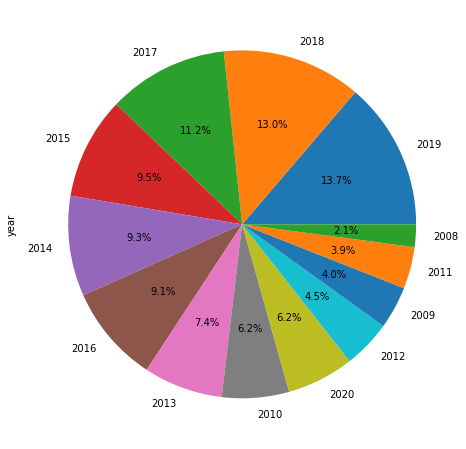

In [156]:
# number of women killed by years

df["year"].value_counts().plot(kind="pie",autopct='%1.1f%%',figsize = (10, 8) )

In [157]:
df.head()

,id,city,age,date,protectionorder,why1,killer1,killingway1,statusofkiller,year
0,1,Adana,Adult,01/02/2008,Undetectable,Because something that a man wanted did not ha...,Husband,Firearm,NaN,2008
1,2,Adana,NaN,01/12/2008,No,Undetectable,Boyfriend,Firearm,Suicide,2008
2,3,Adana,Underage,01/02/2008,No,Undetectable,Father,Assault,Prisoner,2008
3,4,Adana,NaN,01/04/2008,No,Undetectable,Ex Boyfriend,Firearm,Suicide,2008
4,5,Ankara,NaN,01/12/2008,Undetectable,Undetectable,Undetectable,Undetectable,Undetectable,2008


<AxesSubplot:>

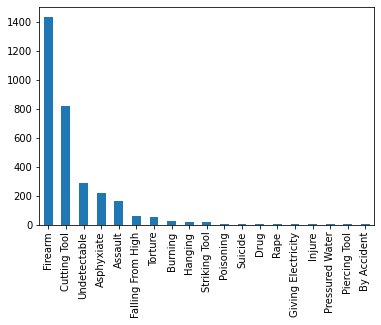

In [158]:
# How the victim was killed

df["killingway1"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='statusofkiller'>

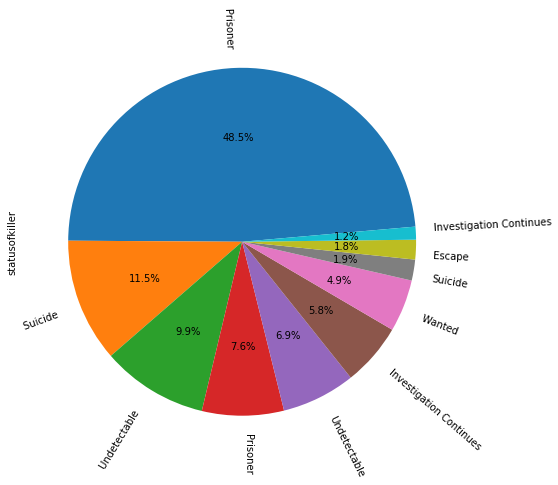

In [159]:
#Status of Killer

df["statusofkiller"].value_counts().head(10).plot(kind="pie",figsize=(10,8),autopct="%1.1f%%",startangle=5,rotatelabels=30)

In [160]:
df.head()

,id,city,age,date,protectionorder,why1,killer1,killingway1,statusofkiller,year
0,1,Adana,Adult,01/02/2008,Undetectable,Because something that a man wanted did not ha...,Husband,Firearm,NaN,2008
1,2,Adana,NaN,01/12/2008,No,Undetectable,Boyfriend,Firearm,Suicide,2008
2,3,Adana,Underage,01/02/2008,No,Undetectable,Father,Assault,Prisoner,2008
3,4,Adana,NaN,01/04/2008,No,Undetectable,Ex Boyfriend,Firearm,Suicide,2008
4,5,Ankara,NaN,01/12/2008,Undetectable,Undetectable,Undetectable,Undetectable,Undetectable,2008


<AxesSubplot:ylabel='killer1'>

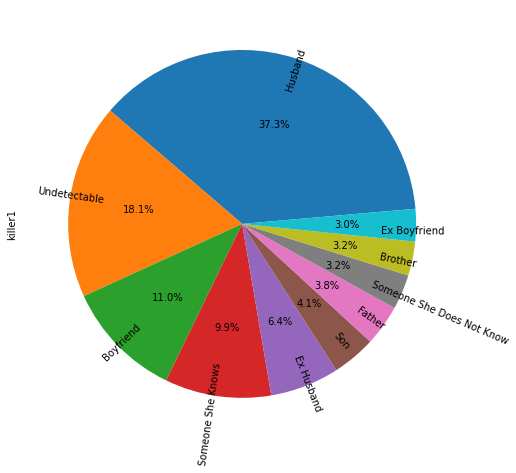

In [161]:
#Killed by whom

df["killer1"].value_counts().head(10).plot(kind="pie",figsize=(10,8),autopct="%1.1f%%",startangle=5,rotatelabels=30,labeldistance=0.8)

In [162]:
# Killed by whom

df["killer1"].value_counts().head(10)

Husband                      1039
Undetectable                  504
Boyfriend                     306
Someone She Knows             275
Ex Husband                    179
Son                           113
Father                        106
Someone She Does Not Know      90
Brother                        88
Ex Boyfriend                   84
Name: killer1, dtype: int64

In [163]:
df["death"]=1

In [164]:
df.head()

,id,city,age,date,protectionorder,why1,killer1,killingway1,statusofkiller,year,death
0,1,Adana,Adult,01/02/2008,Undetectable,Because something that a man wanted did not ha...,Husband,Firearm,NaN,2008,1
1,2,Adana,NaN,01/12/2008,No,Undetectable,Boyfriend,Firearm,Suicide,2008,1
2,3,Adana,Underage,01/02/2008,No,Undetectable,Father,Assault,Prisoner,2008,1
3,4,Adana,NaN,01/04/2008,No,Undetectable,Ex Boyfriend,Firearm,Suicide,2008,1
4,5,Ankara,NaN,01/12/2008,Undetectable,Undetectable,Undetectable,Undetectable,Undetectable,2008,1


In [165]:
# Remove spaces at the beginning and at the end of the string

df["city"] = df["city"].str.strip() #lets remove spaces.

In [166]:
#murder rate by city

df.groupby("city").agg({"death":"sum"}).sort_values("death",ascending=False).head(10)

,death
city,
Istanbul,296
Izmir,122
Antalya,91
Ankara,85
Bursa,83
Adana,79
Konya,62
Gaziantep,57
Mersin,54


<AxesSubplot:>

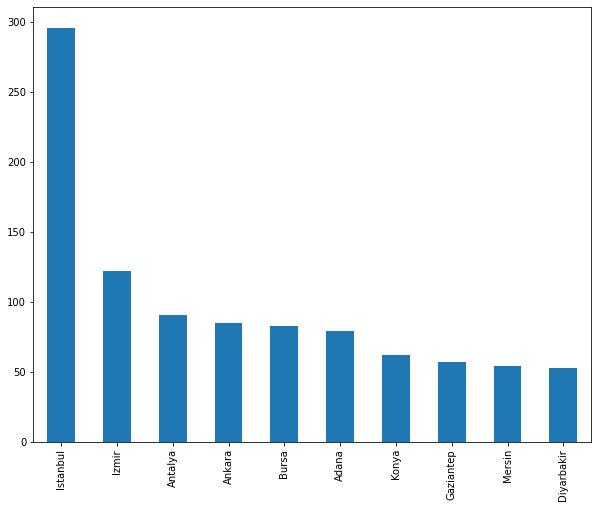

In [167]:
# Visualization of murder rate by city

df["city"].value_counts().head(10).plot(kind="bar",figsize=(10,8))

<AxesSubplot:ylabel='city'>

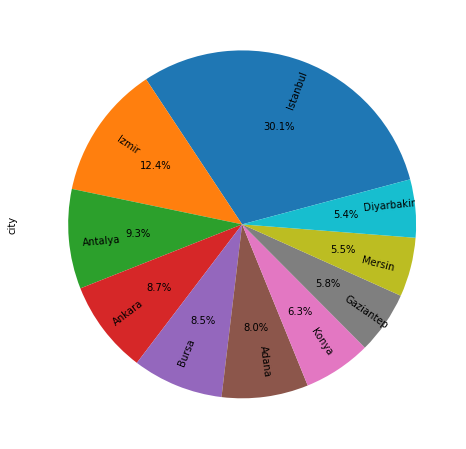

In [168]:
# Visualization of murder rate by city

df["city"].value_counts().head(10).plot(kind="pie",figsize=(10,8),autopct="%1.1f%%",startangle=15,rotatelabels=90,labeldistance=0.7)

In [169]:
df.head()

,id,city,age,date,protectionorder,why1,killer1,killingway1,statusofkiller,year,death
0,1,Adana,Adult,01/02/2008,Undetectable,Because something that a man wanted did not ha...,Husband,Firearm,NaN,2008,1
1,2,Adana,NaN,01/12/2008,No,Undetectable,Boyfriend,Firearm,Suicide,2008,1
2,3,Adana,Underage,01/02/2008,No,Undetectable,Father,Assault,Prisoner,2008,1
3,4,Adana,NaN,01/04/2008,No,Undetectable,Ex Boyfriend,Firearm,Suicide,2008,1
4,5,Ankara,NaN,01/12/2008,Undetectable,Undetectable,Undetectable,Undetectable,Undetectable,2008,1


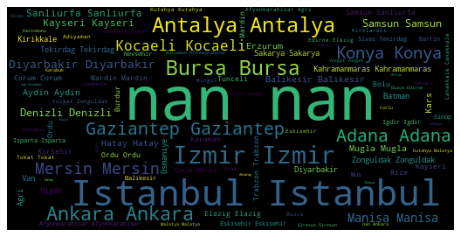

In [170]:
dfYear = df.city
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color = 'black',
    width = 512,
    height = 256,
    ).generate(" ".join(str(df) for df in dfYear))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### There is a high rate of femicide in big cities.
* Husband                      1039
* Undetectable                  504
* Boyfriend                     306

**Having a boyfriend after a husband is a very dangerous situation in Turkey.**